In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("BigMart_sales.csv") # read the data

1. Identify the number of rows and columns

In [3]:
df.shape
#There are 8523 rows and 12 colums

(8523, 12)

2. How many colums are there and a brief description on each

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### column description
- Item identifier : A key column to identify each column
- Item_weight : Weight of item content
- Item_Fat_Content : Fat content in the items where it is low fat or regular fat
- Item_Visibility : The % of the total display area in a store allocated to the particular product
- Item_MRP : MRP of the items
- Outlet_Identifier : A key column to identify each outet was location
- Outlet_Establishment_Year : year when the  outlet was established
- Outlet_Size : The size of the outlet
- Outlet_Location_Type : The type of outlet:Grocery or supermarkets: whether it is 'Tier 1', 'Tier 3', 'Tier 2'.
- Item_Outlet_Sales :Total sales of the items in each outlet(The target in study)

#### Problem Statement :
- Analyze the data and understand the factors impacting the sales in each outlet
- Identify the anomilies and trends in the data using charts and visuals
- Handle missing values and outliers with appropriate techniques and clean the data

### Step-1 : Understanding the data
- Check for missing values and their distribution across variables, as missing data can significantly
affect the quality and reliability of your analysis.
- Identify the data types and formats for each variable, as this information is essential for subsequent
data manipulation and analysis steps.
- Look for any obvious errors or inconsistencies in the data, such as invalid values, mismatched units,
or outliers, which could indicate data quality issues.

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing values are found in item_weight colum(1462 as a count and 17%) and outlet size(2410, approx 28%) Mising data can significantly affect the quality and reliability of our analysis and therefore needs to be handled during the process

- Identify the data types and formats for each variable, as this information is essential for subsequent data manipulation and analysis steps.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. The categorical columns are : Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type
2. Numerical Columns : Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales

- Check for duplicate records, inconsistencies in the data

In [7]:
df.duplicated().sum() # there are no duplicates found

np.int64(0)

In [8]:
categorical_columns = df.select_dtypes(include = "object").columns # to create a subset of a categorical features
numerical_columns = df.select_dtypes(include = ["int64, float64"]).columns # to create a subset of numerical features

In [9]:
for cat in categorical_columns:
    print(f"Unique calues and their counts in {cat}")
    print(df[cat].value_counts())
    print("******************************")

Unique calues and their counts in Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCF42     9
FDW26     9
FDX31     9
         ..
FDY43     1
FDO33     1
FDK57     1
FDQ60     1
FDN52     1
Name: count, Length: 1559, dtype: int64
******************************
Unique calues and their counts in Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
******************************
Unique calues and their counts in Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood               

In [10]:
## Data in columns fat content has to be fixed : Concert LF and Low fat to Low Fat, and reg to Regular
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"reg":"Regular","LF":"Low Fat","low fat":"Low Fat"})

In [11]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [12]:
## Combine all supermarket types under one supermatket
df["Outlet_Type"]=df["Outlet_Type"].replace({"Supermarket Type1":"Supermarket",
                                             "Supermarket Type2":"Supermarket",
                                             "Supermarket Type3":"Supermarket"})

In [13]:
df["Outlet_Type"]=df["Outlet_Type"].replace({"Supermarket Type":"Supermarket"})

In [14]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket      7440
Grocery Store    1083
Name: count, dtype: int64

In [15]:
#### Step 3: Handle Missing Data

In [16]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
df["Item_Weight"].mean(), df["Item_Weight"].median()

(np.float64(12.857645184135976), 12.6)

In [18]:
df["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [19]:
## Median Imputation for item_weight and mode imputation for outlet_size
df.fillna({'Item_Weight' : df["Item_Weight"].median(),"Outlet_Size": df["Outlet_Size"].mode()[0]}, inplace = True)

In [20]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Step-4 :Perform **Univariate Analysis** with distribution plots/countplots
- Univariate analysis is the simplest form of data analysis. It involves analysing data with only one variable to understand its distribution, central tendency, and dispersion

In [38]:
### Distribution plots for numerical columns
%matplotlib inline
for num in numerical_columns:
    if num != "Outlet_Establishment_Year":
        sns.displot(data=df, x=num, bins=15, height=3, aspect=2, kde=True)
        plt.axvline(df[num].mean(),label = "mean", c="red")
        plt.axvline(df[num].median(),label = "mean", c="green")
        plt.title(f'Distribution plot of {num}')
        plt.legend()
        plt.show()

- Item outlet sales and item visibility is posititvey skewed
- Not a clear pattern is visible in item_weight and item_mrp, the data seems symmetrical in item weight
- Majority of the weights are ar0und 12 units
- MRP value seems to follow Uniform Distribution

In [26]:
# Create countplot for all categorical colums including establishment year

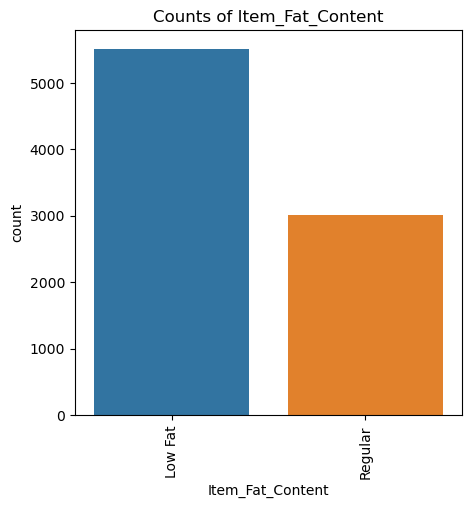

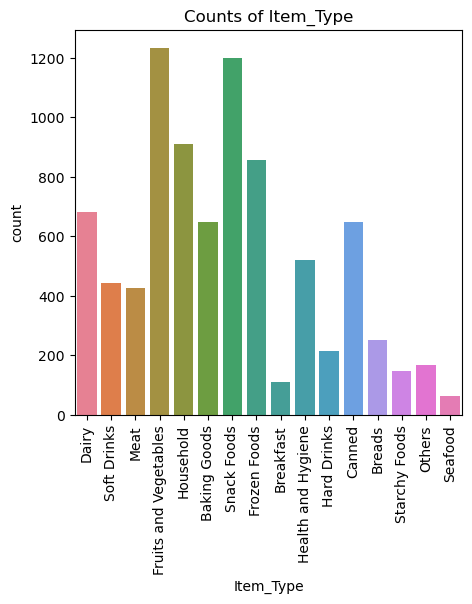

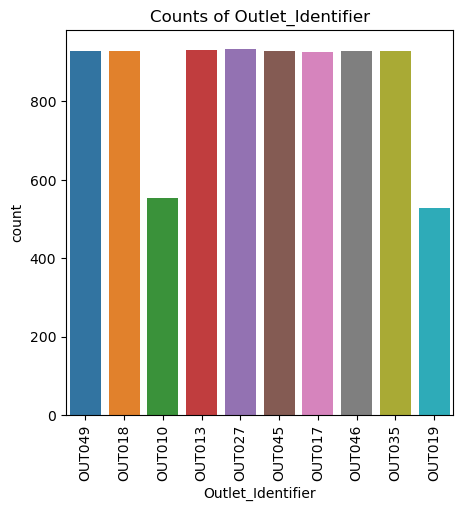

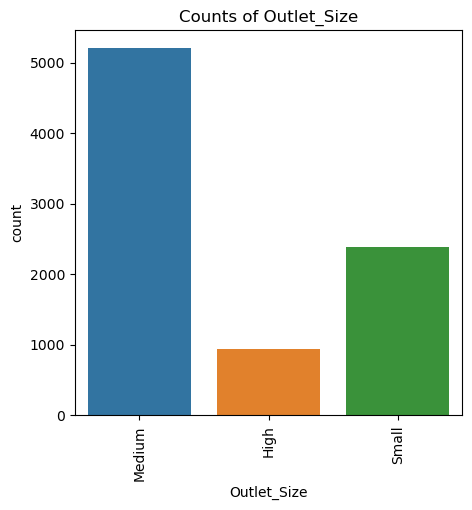

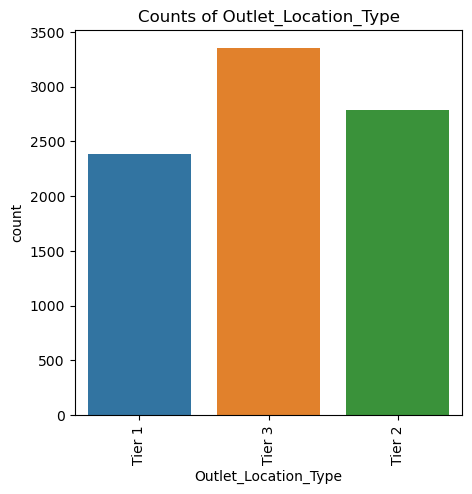

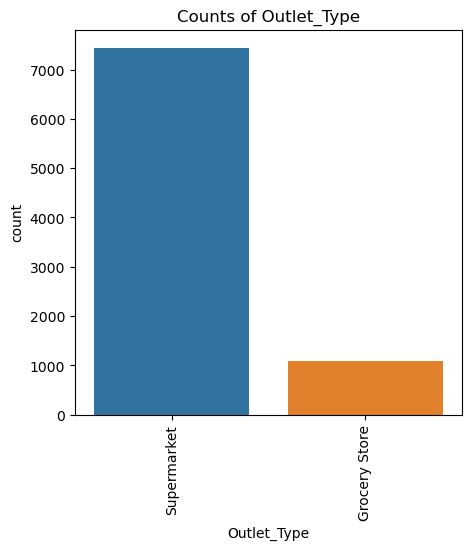

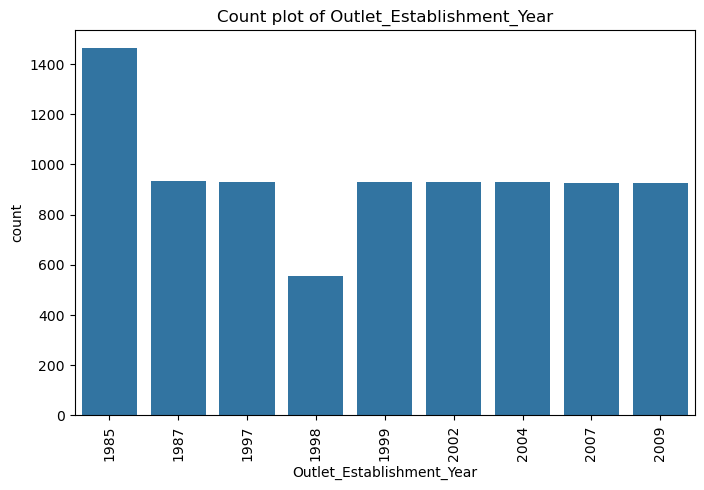

In [32]:
for cat in categorical_columns:
    if cat != "Item_Identifier":
        plt.figure(figsize=(5,5))
        sns.countplot(data = df, x=cat, hue = cat)
        plt.title(f'Counts of {cat}')
        plt.xticks(rotation=90)
        plt.show()
plt.figure(figsize=(8,5))
sns.countplot(data = df, x="Outlet_Establishment_Year")
plt.title("Count plot of Outlet_Establishment_Year")
plt.xticks(rotation=90)
plt.show()

- Low Fat items are more in number as compared to Regular
- Fruits and Vegetables and snacks are fast seling items compared to other items types
- Highest number of outiers were established in 1985(Noe a significant growth post 1985)
- Supermarket types is fae higher in count as compared to groceries
- Tier 3 has more number of data points
- Medium oulet size is more frequent as compared to small and large size